In [2]:
import os
import pandas as pd

In [37]:
os.chdir("/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg/electrocardiograms")

# Lecture des fichiers ecg.....csv

In [15]:
ecg = pd.read_csv("ecg_2022-02-27_1.csv",skiprows=13,header=None,names=["dérivation","dérivationDI"])

In [16]:
ecg.head()

,dérivation,dérivationDI
0,-357,146.0
1,-488,874.0
2,-489,978.0
3,-455,9.0
4,-452,955.0


<AxesSubplot:>

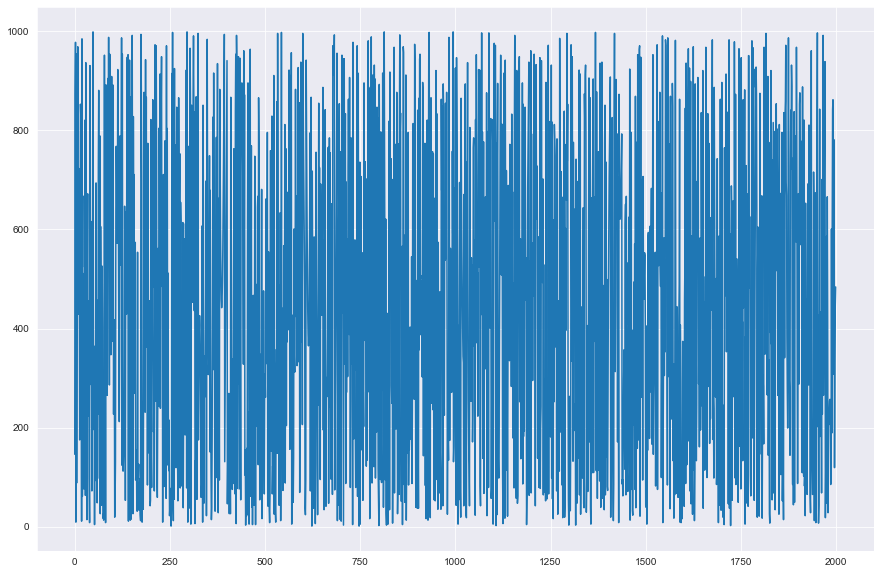

In [29]:
ecg.iloc[0:2000]['dérivationDI'].plot(figsize=(15,10))

<AxesSubplot:>

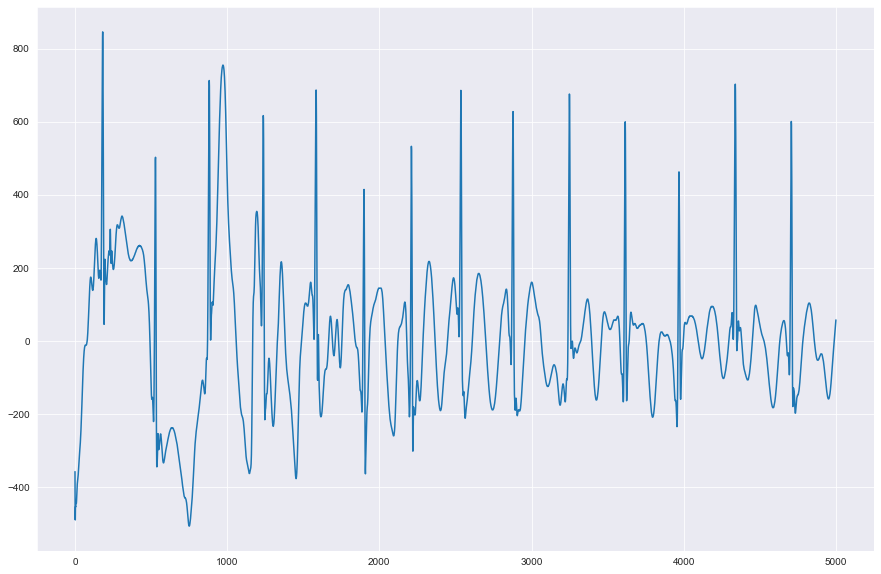

In [28]:
ecg.iloc[0:5000]['dérivation'].plot(figsize=(15,10))

<AxesSubplot:>

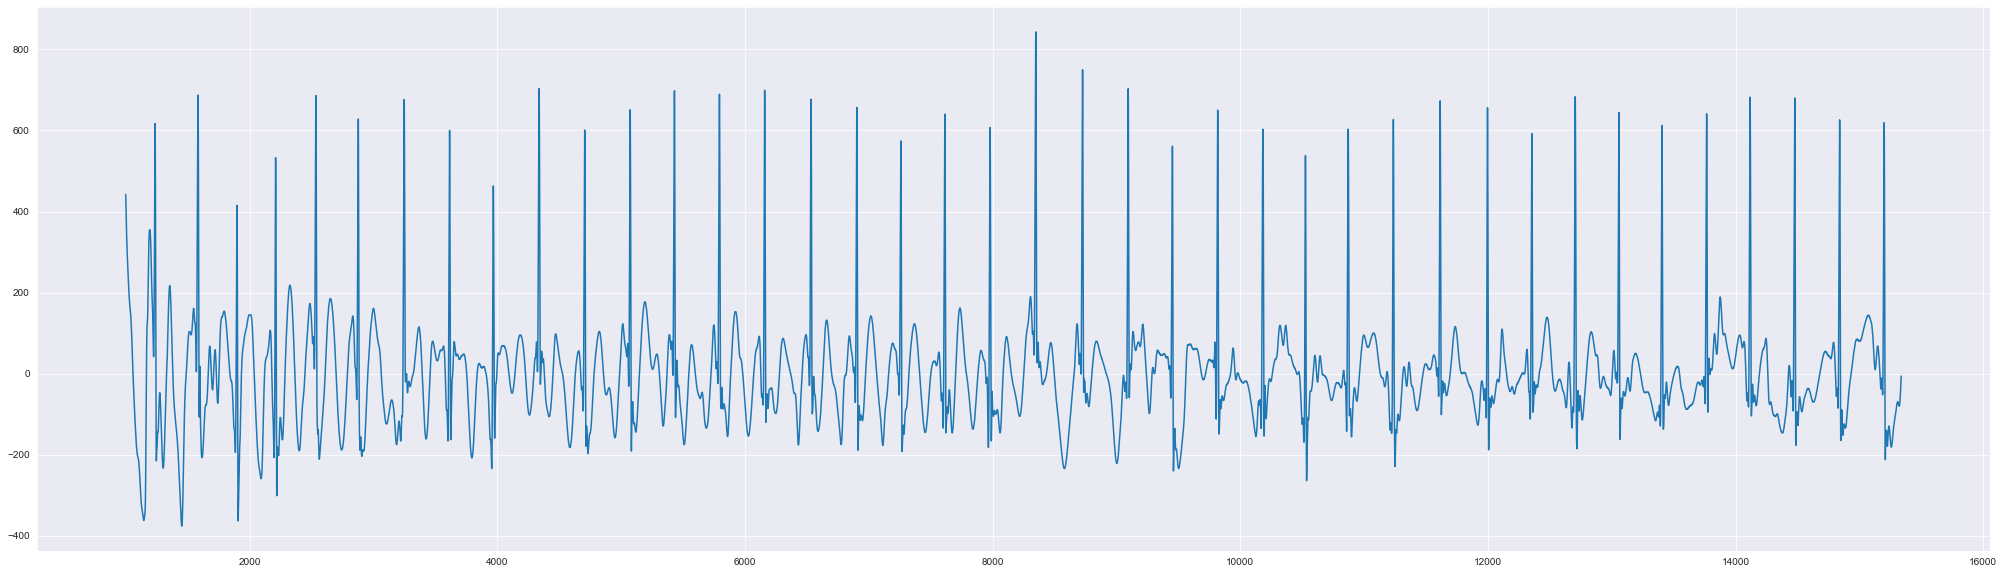

In [32]:
ecg.iloc[1000:]['dérivation'].plot(figsize=(35,10))

In [20]:
ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15337 entries, 0 to 15336
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dérivation    15337 non-null  int64  
 1   dérivationDI  15323 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 239.8 KB


In [18]:
ecg.describe()

,dérivation,dérivationDI
count,15337.000000,15323.000000
mean,1.878399,455.492658
std,146.764123,304.552587
min,-506.000000,1.000000
25%,-77.000000,167.500000
50%,-9.000000,446.000000
75%,61.000000,719.000000
max,846.000000,999.000000


# Extraction rythme cardiaque du fichier export.xml

In [38]:
os.chdir("..")
print(os.getcwd())

/Users/Patrice/DataspellProjects/Physio/Data/La_planete_au_tresor/ecg


In [61]:
rythme = pd.read_xml("export.xml", xpath=".//Record[@type='HKQuantityTypeIdentifierHeartRate']")

In [62]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           66868 non-null  object 
 1   sourceName     66868 non-null  object 
 2   sourceVersion  66868 non-null  object 
 3   device         66868 non-null  object 
 4   unit           66868 non-null  object 
 5   creationDate   66868 non-null  object 
 6   startDate      66868 non-null  object 
 7   endDate        66868 non-null  object 
 8   value          66868 non-null  float64
 9   MetadataEntry  0 non-null      float64
dtypes: float64(2), object(8)
memory usage: 5.1+ MB


In [63]:
rythme.head(10)

,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value,MetadataEntry
0,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669ae0>, name:Apple Watch, ma...",count/min,2020-03-17 09:29:35 +0100,2020-03-17 09:24:38 +0100,2020-03-17 09:24:38 +0100,92.0,NaN
1,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bac0>, name:Apple Watch, ma...",count/min,2020-03-17 11:41:52 +0100,2020-03-17 09:27:54 +0100,2020-03-17 09:27:54 +0100,93.0,NaN
2,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x2816680a0>, name:Apple Watch, ma...",count/min,2020-03-18 11:06:59 +0100,2020-03-18 11:06:58 +0100,2020-03-18 11:06:58 +0100,82.0,NaN
3,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bc00>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:04 +0100,2020-03-18 11:07:00 +0100,2020-03-18 11:07:00 +0100,82.0,NaN
4,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166bb60>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:12 +0100,2020-03-18 11:07:12 +0100,91.0,NaN
5,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281669b30>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,2020-03-18 11:07:13 +0100,89.0,NaN
6,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x281668b40>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:15 +0100,2020-03-18 11:07:14 +0100,2020-03-18 11:07:14 +0100,89.0,NaN
7,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166aa80>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:15 +0100,2020-03-18 11:07:15 +0100,88.0,NaN
8,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a7b0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,2020-03-18 11:07:16 +0100,84.0,NaN
9,HKQuantityTypeIdentifierHeartRate,Apple Watch,6.1.3,"<<HKDevice: 0x28166a0d0>, name:Apple Watch, ma...",count/min,2020-03-18 11:07:18 +0100,2020-03-18 11:07:17 +0100,2020-03-18 11:07:17 +0100,90.0,NaN


In [64]:
rythme = rythme[['creationDate','startDate','value']]

<AxesSubplot:>

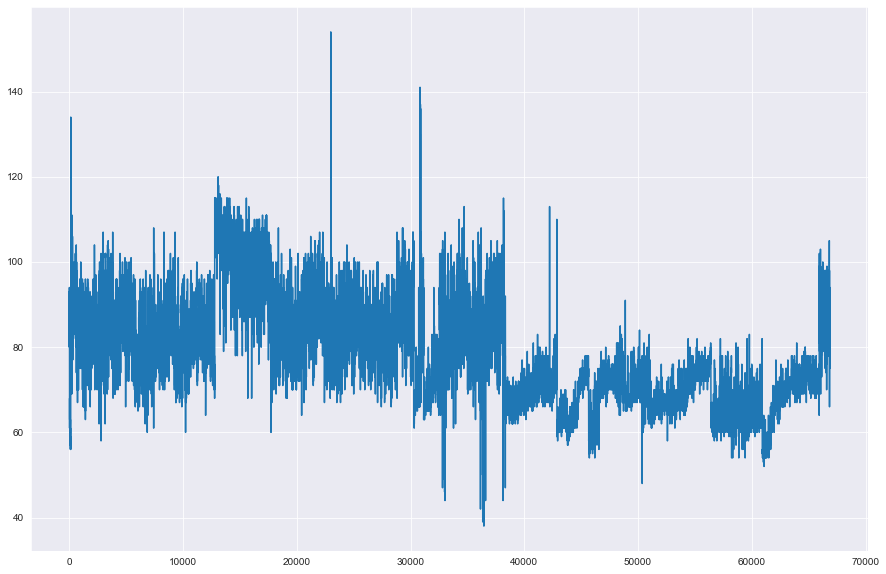

In [69]:
rythme['value'].astype(float).plot(figsize=(15,10))

In [66]:
rythme['creationDate'] = pd.to_datetime(rythme['creationDate'])
rythme['startDate'] = pd.to_datetime(rythme['startDate'])
rythme['value'] = rythme['value'].astype(int)

In [67]:
rythme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66868 entries, 0 to 66867
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype                               
---  ------        --------------  -----                               
 0   creationDate  66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 1   startDate     66868 non-null  datetime64[ns, pytz.FixedOffset(60)]
 2   value         66868 non-null  int64                               
dtypes: datetime64[ns, pytz.FixedOffset(60)](2), int64(1)
memory usage: 1.5 MB


In [68]:
rythme.describe()

,value
count,66868.000000
mean,78.717443
std,12.040502
min,38.000000
25%,69.000000
50%,77.000000
75%,87.000000
max,154.000000
